<a href="https://colab.research.google.com/github/gunjanak/Data_Mining/blob/main/3d_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspiration

https://link.springer.com/article/10.1057/dbm.2012.17

***The Task***

In given data choose countries whose name start with 'S'.

Then find pattern or make cluster according to customer.

Here I have chosen or used three parameters.
Amount 

Frequency

Recency

In [1]:
import pandas as pd

Import the data from my drive

In [2]:
a = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data assignment/Data/online_retail_II.xlsx") 

In [3]:
buffer_df = a

Choosing countries whose name starts with 'S'

In [4]:
buffer_df['Country_S'] = list( 
    map(lambda x: x.startswith('S'), buffer_df['Country']))

In [5]:
S_df = buffer_df

In [6]:
S_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Country_S
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False


In [7]:
S_df = S_df[S_df.Country_S == True]

In [8]:
S_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Country_S
6764,C489955,20870,OPULENT VELVET CANDLE IN BOX,-1,2009-12-03 10:57:00,2.10,12484.0,Spain,True
6765,C489955,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,2009-12-03 10:57:00,1.25,12484.0,Spain,True
11177,490295,79323P,PINK CHERRY LIGHTS,4,2009-12-04 13:47:00,6.75,12510.0,Spain,True
11178,490295,79323W,WHITE CHERRY LIGHTS,4,2009-12-04 13:47:00,6.75,12510.0,Spain,True
11179,490295,79323B,BLACK CHERRY LIGHTS,4,2009-12-04 13:47:00,6.75,12510.0,Spain,True


Selecting columns of interest

In [9]:
df1 = S_df[['Invoice','StockCode','Quantity','Price','InvoiceDate','Customer ID']]

In [10]:
df1.head()

,Invoice,StockCode,Quantity,Price,InvoiceDate,Customer ID
6764,C489955,20870,-1,2.10,2009-12-03 10:57:00,12484.0
6765,C489955,21232,-1,1.25,2009-12-03 10:57:00,12484.0
11177,490295,79323P,4,6.75,2009-12-04 13:47:00,12510.0
11178,490295,79323W,4,6.75,2009-12-04 13:47:00,12510.0
11179,490295,79323B,4,6.75,2009-12-04 13:47:00,12510.0


Making new column (Amount)

In [11]:
df1['Amount'] = df1['Quantity']*df1['Price']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1.head()

,Invoice,StockCode,Quantity,Price,InvoiceDate,Customer ID,Amount
6764,C489955,20870,-1,2.10,2009-12-03 10:57:00,12484.0,-2.10
6765,C489955,21232,-1,1.25,2009-12-03 10:57:00,12484.0,-1.25
11177,490295,79323P,4,6.75,2009-12-04 13:47:00,12510.0,27.00
11178,490295,79323W,4,6.75,2009-12-04 13:47:00,12510.0,27.00
11179,490295,79323B,4,6.75,2009-12-04 13:47:00,12510.0,27.00


Extracting date of purchase

In [13]:
df1['Date'] = df1['InvoiceDate'].dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1.head()

,Invoice,StockCode,Quantity,Price,InvoiceDate,Customer ID,Amount,Date
6764,C489955,20870,-1,2.10,2009-12-03 10:57:00,12484.0,-2.10,2009-12-03
6765,C489955,21232,-1,1.25,2009-12-03 10:57:00,12484.0,-1.25,2009-12-03
11177,490295,79323P,4,6.75,2009-12-04 13:47:00,12510.0,27.00,2009-12-04
11178,490295,79323W,4,6.75,2009-12-04 13:47:00,12510.0,27.00,2009-12-04
11179,490295,79323B,4,6.75,2009-12-04 13:47:00,12510.0,27.00,2009-12-04


Taking only columns of interest

In [15]:
df2 = df1[["Customer ID",'Amount','Date']]

In [16]:
df2.head()

,Customer ID,Amount,Date
6764,12484.0,-2.10,2009-12-03
6765,12484.0,-1.25,2009-12-03
11177,12510.0,27.00,2009-12-04
11178,12510.0,27.00,2009-12-04
11179,12510.0,27.00,2009-12-04


Counting unique entries in each columns

In [17]:
n = df2.nunique(axis=0) 

In [18]:
n

Customer ID     56
Amount         479
Date           123
dtype: int64

Making new column 'Frequency' which takes account of how many times a customer have done the shopping

In [19]:
frequency = df2.groupby('Customer ID')['Date'].nunique()

In [20]:
frequency

Customer ID
12357.0     1
12371.0     2
12376.0     2
12377.0     2
12378.0     1
12409.0     4
12410.0     1
12413.0     1
12417.0     1
12418.0     4
12419.0     2
12421.0     3
12422.0     6
12445.0     2
12450.0     5
12451.0     3
12454.0     5
12457.0     2
12458.0     2
12459.0     1
12482.0     7
12483.0    11
12484.0     8
12485.0     1
12486.0     1
12487.0     1
12495.0     2
12496.0     1
12503.0     1
12507.0     1
12510.0     8
12537.0     1
12538.0     1
12539.0     2
12540.0    14
12542.0     4
12543.0     1
12547.0     1
12554.0     1
12555.0     1
12557.0     4
12570.0     1
12606.0     1
12629.0     2
12638.0     1
12639.0     2
12661.0     1
12676.0     3
12687.0     1
12744.0     2
12801.0     2
12807.0     3
13501.0     3
13520.0     8
17097.0     2
17404.0    10
Name: Date, dtype: int64

In [21]:
minimum = df2.groupby('Customer ID')['Amount'].min()

In [22]:
minimum

Customer ID
12357.0     10.08
12371.0      5.04
12376.0     10.20
12377.0      5.04
12378.0      5.04
12409.0   -122.40
12410.0     10.08
12413.0      8.95
12417.0      4.20
12418.0     -4.25
12419.0      4.56
12421.0     -5.00
12422.0    -36.00
12445.0     -8.50
12450.0    -14.85
12451.0    -12.50
12454.0   -950.40
12457.0    -39.80
12458.0      4.56
12459.0      8.50
12482.0   -874.84
12483.0    -52.46
12484.0    -12.75
12485.0      6.30
12486.0      3.80
12487.0    -25.50
12495.0    -17.00
12496.0      1.25
12503.0    230.00
12507.0      7.80
12510.0   -751.11
12537.0      9.95
12538.0     10.20
12539.0      5.04
12540.0    -56.00
12542.0    -15.90
12543.0      7.80
12547.0     10.08
12554.0      5.04
12555.0    129.23
12557.0     27.20
12570.0     77.52
12606.0     21.00
12629.0      7.80
12638.0     10.20
12639.0      5.04
12661.0     13.20
12676.0    -70.00
12687.0      6.72
12744.0      5.04
12801.0    -39.95
12807.0    -40.00
13501.0    -15.00
13520.0    -39.60
17097.0      0.4

In [23]:
total = df2.groupby('Customer ID')['Amount'].sum()

In [24]:
mean = df2.groupby('Customer ID')['Amount'].mean()

In [25]:
maximum = df2.groupby('Customer ID')['Amount'].max()

In [26]:
first_purchase = df2.groupby('Customer ID')['Date'].min()

In [27]:
first_purchase

Customer ID
12357.0    2010-11-16
12371.0    2010-03-04
12376.0    2010-10-18
12377.0    2010-04-29
12378.0    2010-05-26
12409.0    2010-05-23
12410.0    2010-07-25
12413.0    2010-11-02
12417.0    2010-10-01
12418.0    2010-03-19
12419.0    2010-10-22
12421.0    2010-07-22
12422.0    2010-05-20
12445.0    2010-10-15
12450.0    2010-08-22
12451.0    2010-06-28
12454.0    2010-01-26
12457.0    2010-09-30
12458.0    2010-08-09
12459.0    2010-04-13
12482.0    2010-02-24
12483.0    2010-01-31
12484.0    2009-12-03
12485.0    2010-06-28
12486.0    2010-10-04
12487.0    2009-12-09
12495.0    2010-03-09
12496.0    2010-03-29
12503.0    2010-05-04
12507.0    2010-05-04
12510.0    2009-12-04
12537.0    2010-10-27
12538.0    2010-11-26
12539.0    2009-12-23
12540.0    2009-12-07
12542.0    2010-03-09
12543.0    2010-09-17
12547.0    2010-07-27
12554.0    2010-09-17
12555.0    2010-01-26
12557.0    2009-12-17
12570.0    2010-01-26
12606.0    2010-01-26
12629.0    2010-10-12
12638.0    2010-03-1

'Recency' is last time customer have purchased 

In [28]:
recency = df2.groupby('Customer ID')['Date'].max()

In [29]:
data = {"frequency": frequency, 
        "minimum": minimum, 
        "maximum": maximum,
        "Total":total,
        "mean":mean,
        "first_purchase":first_purchase,
        "recency":recency
        } 

In [30]:
df4 = pd.concat(data,axis = 1) 

In [64]:
df5 = df4[["frequency",'Total',"recency"]]

In [65]:
df5.head()

,frequency,Total,recency
Customer ID,,,
12357.0,1,12079.99,2010-11-16
12371.0,2,2179.42,2010-10-26
12376.0,2,503.15,2010-11-15
12377.0,2,1798.20,2010-11-23
12378.0,1,1407.70,2010-05-26


Changing date time to int

In [66]:
df5['recency'] = df5.recency.apply(lambda x: x.strftime('%Y%m%d')).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


int to string

In [67]:
df5['recency'] = df5['recency'].map(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


eliminating 1st 2 and last 2 letters of string.

Here our goal is to set recency accoring to month 

In [68]:
df5['recency'] = df5['recency'].str[2:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df5['recency'] = df5['recency'].str[:-2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df5['recency'] = df5['recency'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df5 = df5.sort_values('recency')

Reindexing and other stuffs so that recency is numbered from 1

To make clustering easier

In [39]:
#df5 = df5.reset_index()

In [72]:
df5.head()

,frequency,Total,recency
Customer ID,,,
12487.0,1,259.80,912
12555.0,1,129.23,1001
12570.0,1,77.52,1001
12606.0,1,21.00,1001
12495.0,2,323.40,1003


In [41]:
#df6 = df5[['Customer ID','frequency','Total']]

In [42]:
#df6['Recency'] = df6.index + 1

In [73]:
df6 = df5

In [75]:
df6.head()

,frequency,Total,recency
Customer ID,,,
12487.0,1,259.80,912
12555.0,1,129.23,1001
12570.0,1,77.52,1001
12606.0,1,21.00,1001
12495.0,2,323.40,1003


From dataframe to numpy array

In [76]:
df6_array = df6.values

In [77]:
X = df6_array

Elbow method to find optimum no of clusters

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

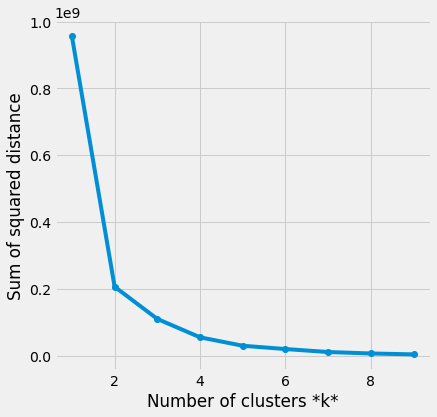

In [79]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');




 silhouette coefficient to find optimum no of clusters

In [80]:
from sklearn.metrics import silhouette_score

In [81]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

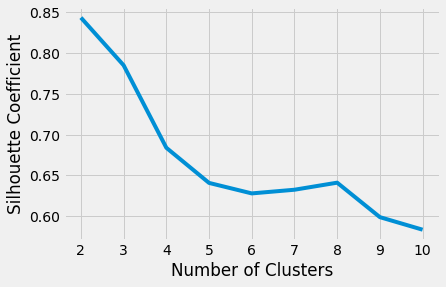

In [82]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


taking cluster size 3

In [83]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels =kmeans.labels_;
centroids = kmeans.cluster_centers_

Text(0.5, 0, 'Recency')

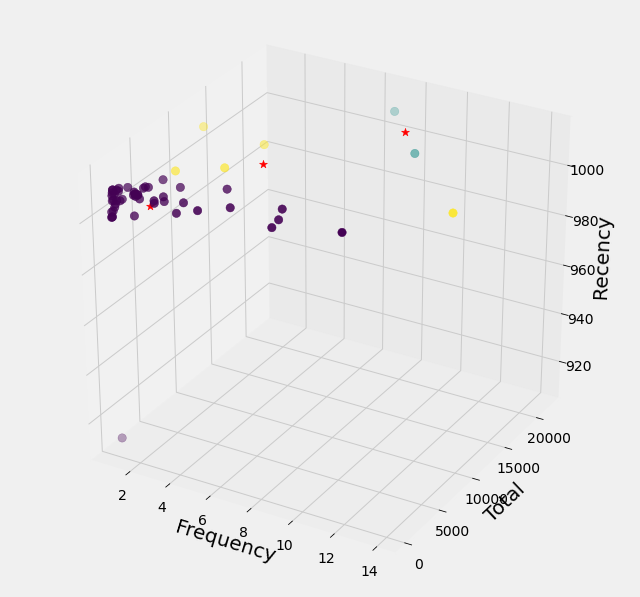

In [102]:
plt.figure('Spanish Customer', figsize=(10,10))
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=labels, s=70)
ax.scatter(centroids[0,0],centroids[0,1],centroids[0,2],c='r', s=70, marker='*', label='centroid')
ax.scatter(centroids[1,0],centroids[1,1],centroids[1,2],c='r', s=70, marker='*',label='centroid')
ax.scatter(centroids[2,0],centroids[2,1],centroids[2,2] ,c='r', s=70, marker='*',label='centroid')
ax.set_xlabel('Frequency', fontsize=20)
ax.set_ylabel('Total', fontsize=20)
ax.set_zlabel('Recency', fontsize=20)

Calculating min and max for each variable in each cluster

In [85]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2], dtype=int32)

In [86]:
X.shape

(56, 3)

In [87]:
labels.shape

(56,)

In [88]:
label0=[]
maxf = 0
maxt = 0
maxr = 0

minf = 1000000000
mint = 1000000000
minr = 1000000000
for i in range(56):
  
  if(labels[i]==0):
    label0.append(X[i])

    if(X[i][0]>maxf):
      maxf=X[i][0]
    if(X[i][1]>maxt):
      maxt=X[i][1]
    if(X[i][2]>maxr):
      maxr=X[i][2]

    if(X[i][0]<minf):
      minf=X[i][0]
    if(X[i][1]<mint):
      mint=X[i][1]
    if(X[i][2]<minr):
      minr=X[i][2]
    

In [89]:
print(maxf,maxt,maxr,minf,mint,minr)

11.0 4292.709999999999 1012.0 1.0 21.0 912.0


In [ ]:
label0

***For cluster 0***

min freq = 1

min total = 21

min recency = 912



max freq = 11

max total = 4292.7099

max recency = 1012

In [91]:
label1=[]
maxf = 0
maxt = 0
maxr = 0

minf = 1000000000
mint = 1000000000
minr = 1000000000
for i in range(56):
  
  if(labels[i]==1):
    label1.append(X[i])

    if(X[i][0]>maxf):
      maxf=X[i][0]
    if(X[i][1]>maxt):
      maxt=X[i][1]
    if(X[i][2]>maxr):
      maxr=X[i][2]

    if(X[i][0]<minf):
      minf=X[i][0]
    if(X[i][1]<mint):
      mint=X[i][1]
    if(X[i][2]<minr):
      minr=X[i][2]
    

In [92]:
print(maxf,maxt,maxr,minf,mint,minr)

10.0 21893.529999999984 1011.0 7.0 15705.999999999998 1009.0


***For cluster 1***

min freq = 7

min total = 15705.99

min recency = 1009



max freq = 10

max total = 21893.5299

max recency = 1011

In [93]:
label2=[]
maxf = 0
maxt = 0
maxr = 0

minf = 1000000000
mint = 1000000000
minr = 1000000000
for i in range(56):
  
  if(labels[i]==2):
    label2.append(X[i])

    if(X[i][0]>maxf):
      maxf=X[i][0]
    if(X[i][1]>maxt):
      maxt=X[i][1]
    if(X[i][2]>maxr):
      maxr=X[i][2]

    if(X[i][0]<minf):
      minf=X[i][0]
    if(X[i][1]<mint):
      mint=X[i][1]
    if(X[i][2]<minr):
      minr=X[i][2]
    

In [94]:
print(maxf,maxt,maxr,minf,mint,minr)

14.0 12079.98999999999 1012.0 1.0 5646.399999999998 1009.0


***For cluster 2***

min freq = 1

min total = 5646.399

min recency = 1009



max freq = 14

max total = 12079

max recency = 1012